# Welcome to the MergerTrain Github!

<img src="../merger-train-logo.png" width='1000'>

In this notebook, we demonstrate the use case of our trained models and present data products available for training your own post-merger classifier. Due to the github storage limitations, we are limited to a single example here and thus do not demonstrate how to train a model. For the full sample used in [Wilkinson et al. (2024)](https://arxiv.org/abs/2401.13654), please see the [published data](https://www.canfar.net/storage/vault/list/AstroDataCitationDOI/CISTI.CANFAR/23.0031/data/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits as pyfits
import pickle, os

## Example of SKIRT Photometry

In [2]:
# download and unzip SKIRT photometry
#!vcp vos:/AstroDataCitationDOI/CISTI.CANFAR/23.0031/data/Photometry/skirt_output_snap95.tar.gz ./../Photometry/
#!tar -xvf /../Photometry/skirt_output_snap95.tar.gz

In [3]:
# four images were zipped (individually) to avoid exceeding the github 100MB file size limit
# let's unzip those

for i in range(4):
    os.system(f'tar -xvf ./../Photometry/095/shalo_095-300483_v{i}_photo.fits.tar.gz -C ./../Photometry/095/')
    

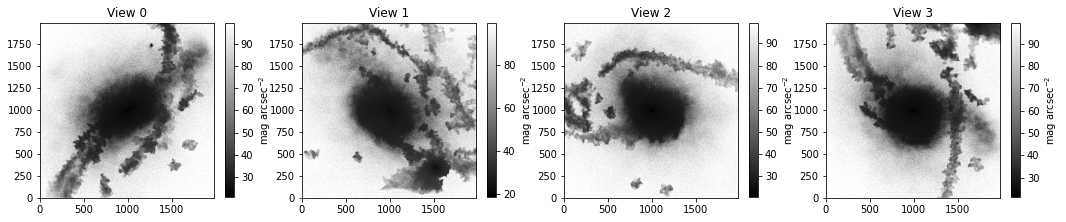

In [4]:
fig, axes = plt.subplots(1,4, figsize = (18, 4))

for i in range(4):

    with pyfits.open(f'./../Photometry/095/shalo_095-300483_v{i}_photo.fits') as hdu:
        skirt_image = hdu[0].data

    axes[i].set_title(f'View {i}')
    out = axes[i].imshow(skirt_image, origin = 'lower', cmap = 'gray')
    plt.colorbar(out, label = 'mag arcsec$^{-2}$', ax = axes[i], shrink = 0.8)
    
plt.show()

## Example of Idealized Imaging

In [5]:
# uncomment to download and unzip idealized images
#!vcp vos:/AstroDataCitationDOI/CISTI.CANFAR/23.0031/data/Idealized/IllustrisTNG100-1_depth=30_psf=0_filter=CFHT_MegaCam.r.tar.gz ./../Idealized/
#!tar -xvf /../Idealized/IllustrisTNG100-1_depth=30_psf=0_filter=CFHT_MegaCam.r.tar.gz

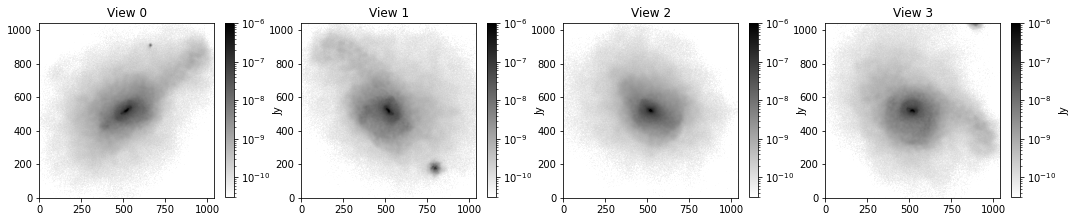

In [6]:
fig, axes = plt.subplots(1,4, figsize = (18, 4))

for i in range(4):

    with pyfits.open(f'./../Idealized/IllustrisTNG100-1_95_300483_depth=30_psf=0_view=v{i}_filter=CFHT_MegaCam.r.fits') as hdu:
        skirt_image = hdu[0].data

    norm = LogNorm(vmin=3e-11,vmax=1e-6)

    axes[i].set_title(f'View {i}')
    out = axes[i].imshow(skirt_image, origin = 'lower', cmap = 'gray_r', norm = norm)
    plt.colorbar(out, label = 'Jy', ax = axes[i], shrink = 0.8)
    
plt.show()

## Example of Degraded Imaging

In [7]:
# uncomment to download and unzip degraded images
#!vcp vos:/AstroDataCitationDOI/CISTI.CANFAR/23.0031/data/Idealized/IllustrisTNG100-1_depth=26_psf=0.75_filter=CFHT_MegaCam.r.tar.gz ./../Idealized/
#!tar -xvf /../Idealized/IllustrisTNG100-1_depth=26_psf=0.75_filter=CFHT_MegaCam.r.tar.gz

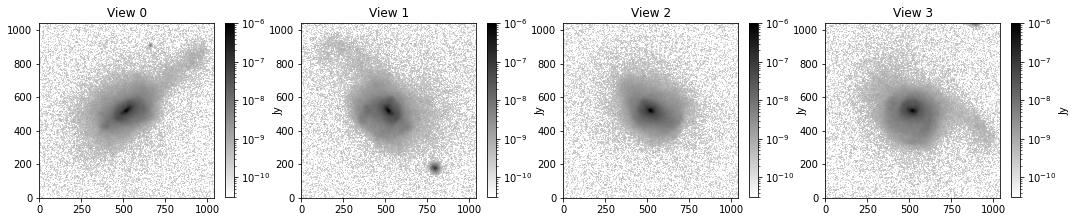

In [8]:
fig, axes = plt.subplots(1,4, figsize = (18, 4))

for i in range(4):

    with pyfits.open(f'./../Degraded/IllustrisTNG100-1_95_300483_depth=26_psf=0.75_view=v{i}_filter=CFHT_MegaCam.r.fits') as hdu:
        skirt_image = hdu[0].data
        
    norm = LogNorm(vmin=3e-11,vmax=1e-6)

    axes[i].set_title(f'View {i}')
    out = axes[i].imshow(skirt_image, origin = 'lower', cmap = 'gray_r', norm = norm)
    plt.colorbar(out, label = 'Jy', ax = axes[i], shrink = 0.8)
    
plt.show()

## Example of Statmorph Output

This example assumes that you have the five non-parametric morphology statistics tested in [Wilkinson et al. (2024)](https://arxiv.org/abs/2401.13654) available for the galaxy you wish to classify. 

If you do not have non-parametric morphologies, the [statmorph documentation](https://statmorph.readthedocs.io/en/latest/), provides a good tutorial for getting you started. To match our specific statmorph implementation, see Section 3.1.4 of [Wilkinson et al. (2022)](https://arxiv.org/abs/2207.04152).

In [9]:
statmorph_data = np.loadtxt('tng-example-statmorph-data.txt', unpack = True, dtype = str)

In [10]:
views = np.array(statmorph_data[4], dtype = str)
A     = np.array(statmorph_data[5], dtype = float)
Ao    = np.array(statmorph_data[6], dtype = float)
As    = np.array(statmorph_data[7], dtype = float)
G     = np.array(statmorph_data[8], dtype = float)
m20   = np.array(statmorph_data[9], dtype = float)

In [11]:
v = 'v0'
print(A[views == v])
print(Ao[views == v])
print(As[views == v])
print(G[views == v])
print(m20[views == v])

[0.12439843]
[0.10704751]
[0.1755879]
[0.58551231]
[-2.17637713]


Statmorph was run on each of the degraded images shown above. The relevant morphology statistics for merger classification were measured as:

|   View   | A        | A$_O$    | A$_S$    | G        | M$_{20}$ |
| -------- | -------- | -------- | -------- | -------- | -------- |
| v0       | $0.1244$ | $0.1070$ | $0.1756$ | $0.5855$ | $-2.176$ |
| v1       | $0.2021$ | $0.2326$ | $0.5310$ | $0.5818$ | $-2.197$ |
| v2       | $0.1144$ | $0.1531$ | $0.3057$ | $0.5910$ | $-2.337$ |
| v3       | $0.1811$ | $0.1839$ | $0.4436$ | $0.6365$ | $-2.421$ |

## Load Example Random Forest

In [12]:
# download trained RF model with vos
!vcp vos:/AstroDataCitationDOI/CISTI.CANFAR/23.0031/data/TrainedModels/RF/model_rf_depth26_fwhm0.75_filter=CFHT_MegaCam.r.pkl ./../TrainedModels/RF/

In [13]:
# load RF model into memory with pickle
rf_file = open('./../TrainedModels/RF/model_rf_depth26_fwhm0.75_filter=CFHT_MegaCam.r.pkl', 'rb')
rf_model = pickle.load(rf_file)
rf_file.close()

## Merger Prediction with Random Forest

In [14]:
# let's pick a single viewing angle and manually input the relevant morphology statistics
v = 'v0'

# morphology statistics can be given directly to the RF to predict merger probability!
nonmerger_prob, merger_prob = rf_model.predict_proba(np.array([0.1244, 0.1070, 0.1756, 0.5855, -2.176]).reshape(-1,1).T)[0]

print(f'The RF predicts a merger probability of {merger_prob:.3f} at viewing angle {v}.')

The RF predicts a merger probability of 0.523 at viewing angle v0.


In [15]:
# now let's automate over several viewing angles of the same galaxy (the same images ares hown above in the degraded example)
for v in ['v0', 'v1', 'v2', 'v3']:

    # prepare relevant data for input to RF
    A_input   = A[views == v]
    Ao_input  = Ao[views == v]
    As_input  = As[views == v]
    G_input   = G[views == v]
    m20_input = m20[views == v]

    # predict post-merger probability with RF
    nonmerger_prob, merger_prob = rf_model.predict_proba(np.array([A_input, Ao_input, As_input, G_input, m20_input]).reshape(-1,1).T)[0]
    
    print(f'The RF predicts a merger probability of {merger_prob:.3f} at viewing angle {v}.')

The RF predicts a merger probability of 0.524 at viewing angle v0.
The RF predicts a merger probability of 0.946 at viewing angle v1.
The RF predicts a merger probability of 0.720 at viewing angle v2.
The RF predicts a merger probability of 0.957 at viewing angle v3.


## Applying Trained Random Forests to Real CFIS Data

The Canada France Imaging Survey (CFIS) is an imaging survey in the [UNIONS](https://unions.skysurvey.cc/) consortium. It has a sigma_sky ~ 25.5 mag arcsec^-2 and median seeing of ~ 0.7 arcsec.

The model_rf_depth26_fwhm0.75_filter=CFHT_MegaCam.r.pkl has been trained on similar (but not identical) image qualities (and without background/foreground contamination and survey artefacts). Let's see if it appropriately identifies galaxies as mergers. 

NB: 

1. We are assuming that non-parametric morphology statistics have already been computed for these images and stored in a file like cfis-example-statmorph-data.txt. 
2. These examples were selected on the basis of having high shape asymmetries and thus do not demonstrate a typical arrangement of galaxies. 

In [16]:
statmorph_cfis = np.loadtxt('cfis-example-statmorph-data.txt', unpack = True, dtype = str)

In [17]:
objID = np.array(statmorph_cfis[0], dtype = str)
mass  = np.array(statmorph_cfis[1], dtype = float)
z     = np.array(statmorph_cfis[2], dtype = float)
A     = np.array(statmorph_cfis[3], dtype = float)
Ao    = np.array(statmorph_cfis[4], dtype = float)
As    = np.array(statmorph_cfis[5], dtype = float)
G     = np.array(statmorph_cfis[6], dtype = float)
m20   = np.array(statmorph_cfis[7], dtype = float)

This is SDSS DR7 Object 587731520664764648
This galaxy has a redshift of 0.113 and log(M/Msun) = 11.255
The RF predicts a merger probability of 0.990 for this CFIS galaxy.


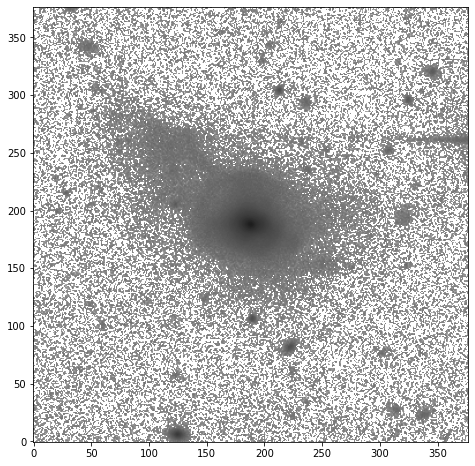

This is SDSS DR7 Object 587731872852869336
This galaxy has a redshift of 0.090 and log(M/Msun) = 11.110
The RF predicts a merger probability of 0.958 for this CFIS galaxy.


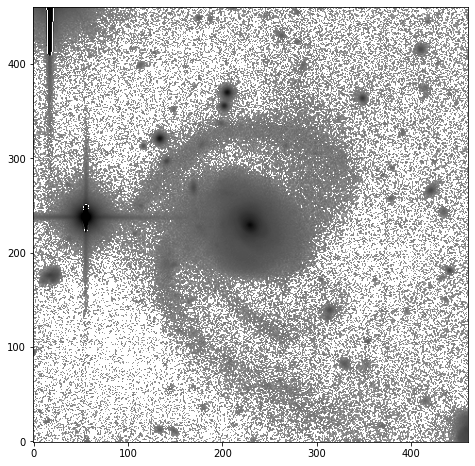

This is SDSS DR7 Object 587731911500103888
This galaxy has a redshift of 0.094 and log(M/Msun) = 11.165
The RF predicts a merger probability of 0.839 for this CFIS galaxy.


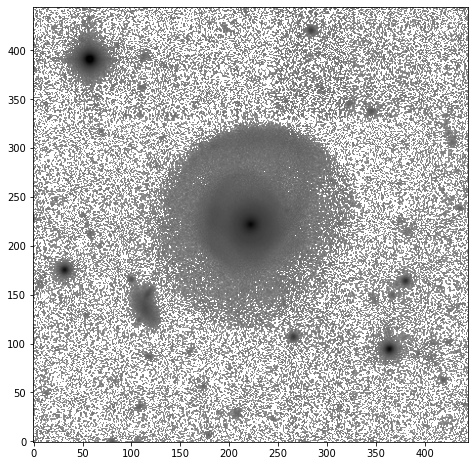

This is SDSS DR7 Object 587733429234499707
This galaxy has a redshift of 0.099 and log(M/Msun) = 11.354
The RF predicts a merger probability of 0.991 for this CFIS galaxy.


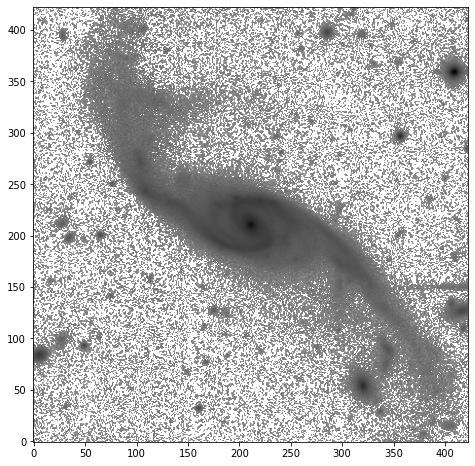

This is SDSS DR7 Object 587733432993710368
This galaxy has a redshift of 0.105 and log(M/Msun) = 11.159
The RF predicts a merger probability of 0.914 for this CFIS galaxy.


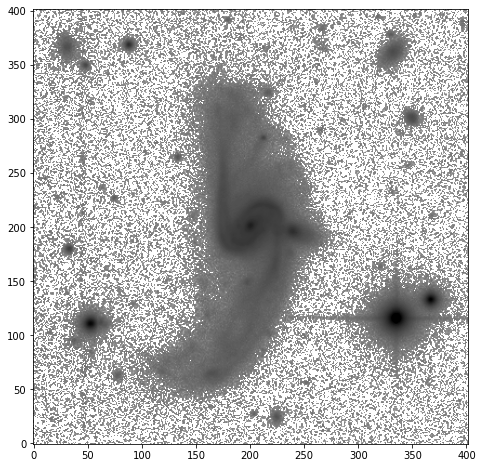

This is SDSS DR7 Object 587725551735537834
This galaxy has a redshift of 0.124 and log(M/Msun) = 10.758
The RF predicts a merger probability of 0.981 for this CFIS galaxy.


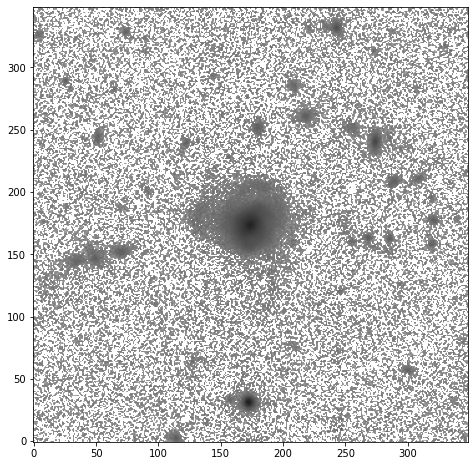

This is SDSS DR7 Object 587725994109108481
This galaxy has a redshift of 0.120 and log(M/Msun) = 10.610
The RF predicts a merger probability of 0.850 for this CFIS galaxy.


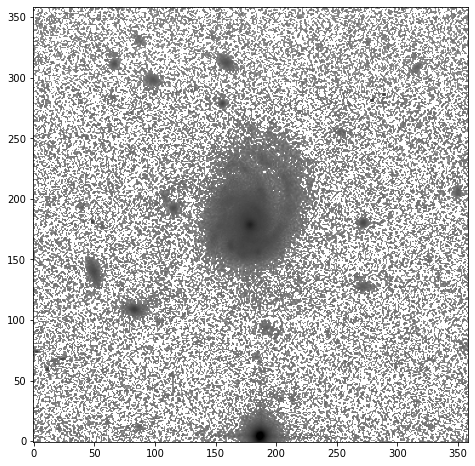

This is SDSS DR7 Object 587728670414340421
This galaxy has a redshift of 0.127 and log(M/Msun) = 10.709
The RF predicts a merger probability of 0.755 for this CFIS galaxy.


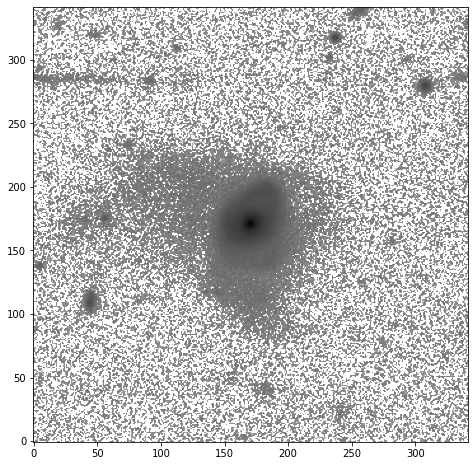

This is SDSS DR7 Object 587729385546383441
This galaxy has a redshift of 0.122 and log(M/Msun) = 10.773
The RF predicts a merger probability of 0.879 for this CFIS galaxy.


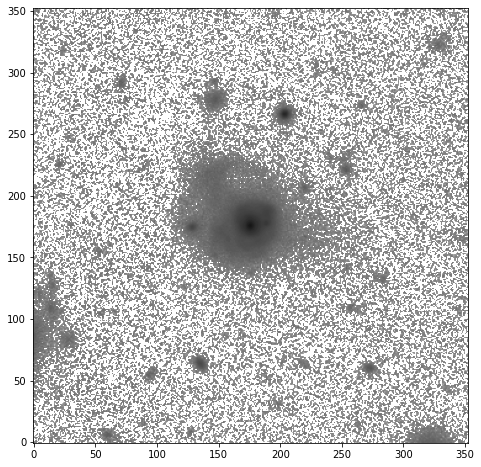

This is SDSS DR7 Object 587729408619119012
This galaxy has a redshift of 0.126 and log(M/Msun) = 10.077
The RF predicts a merger probability of 0.708 for this CFIS galaxy.


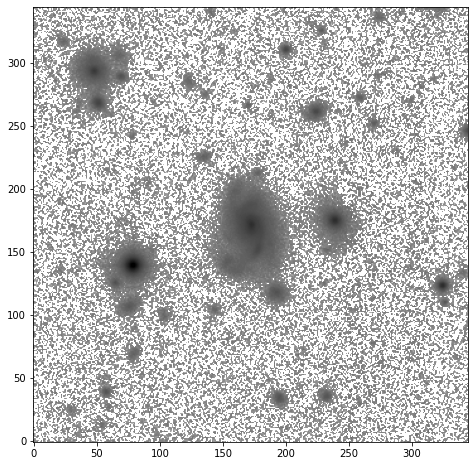

This is SDSS DR7 Object 587729408621281334
This galaxy has a redshift of 0.108 and log(M/Msun) = 10.581
The RF predicts a merger probability of 0.532 for this CFIS galaxy.


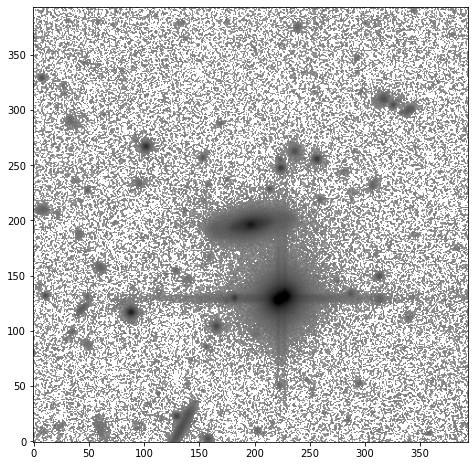

This is SDSS DR7 Object 587729652353073521
This galaxy has a redshift of 0.091 and log(M/Msun) = 10.229
The RF predicts a merger probability of 0.509 for this CFIS galaxy.


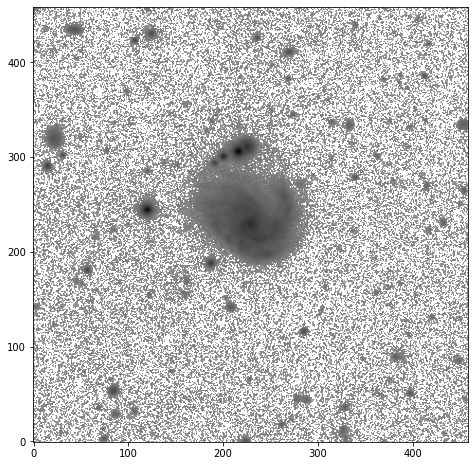

In [18]:
for i in range(len(objID)):
    
    print(f'This is SDSS DR7 Object {objID[i]}')
    print(f'This galaxy has a redshift of {z[i]:.3f} and log(M/Msun) = {mass[i]:.3f}')
    
    # predict CFIS merger
    nonmerger_prob, merger_prob = rf_model.predict_proba(np.array([A[i], Ao[i], As[i], G[i], m20[i]]).reshape(-1,1).T)[0]
    
    print(f'The RF predicts a merger probability of {merger_prob:.3f} for this CFIS galaxy.')
    
    image = pyfits.getdata(f'./ExampleImages/{objID[i]}_CFIS_image_150kpc.fits')
    plt.figure(figsize = (8,8))
    norm = LogNorm(vmin=1e-3,vmax=5e3)
    plt.imshow(image, cmap = 'gray_r', origin = 'lower', norm = norm)
    plt.show()